In [2]:
# libraries we want to use
import numpy as np
import matplotlib.pyplot as plt
import cv2 # read images and controling imgs videos
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [3]:
#preprocessing the train data 
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'train',
    target_size = (48, 48),
    batch_size = 64,
    color_mode = 'grayscale',
    class_mode = 'categorical'
)

#preprocessing the test data
validation_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'test',
    target_size = (48, 48),
    batch_size = 64, 
    color_mode = 'grayscale',
    class_mode = 'categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
#train data
x_train = train_generator[0][0]
y_train = train_generator[0][1]
#test data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

In [5]:
emotions = {0 : 'angry', 1 : 'disgusted', 2 : 'fearful', 3 : 'happy', 4 : 'neutral', 5 : 'sad', 6 : 'surprised'}

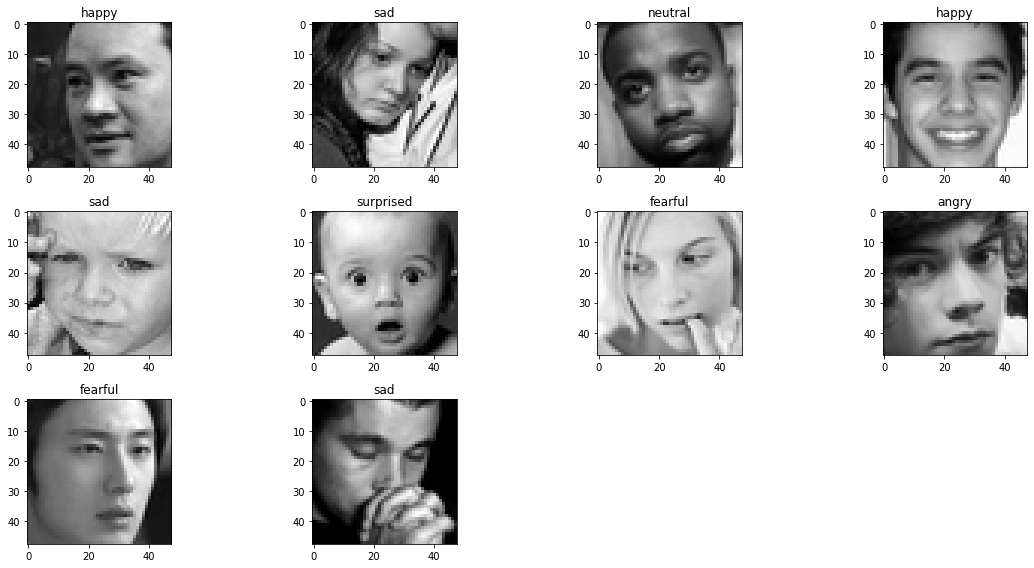

In [6]:
plt.figure(figsize=(16, 8))
for i in range(10):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_train[i], cmap='gray')
    for j, e in emotions.items() :
        if np.argmax(y_train[i]) == j :
            plt.title(e)
    plt.tight_layout()

In [30]:
# make the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [31]:
model.add(Flatten())
model.add(Dense(1280, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))

In [32]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                  

In [34]:
# train the model
training_history = model.fit(
    train_generator,
    epochs = 2,
    steps_per_epoch = 448,
    validation_data = validation_generator,
    validation_steps = 112
)

Epoch 1/2
448/448 [==============================] - 578s 1s/step - loss: 1.7599 - accuracy: 0.2860 - val_loss: 1.6148 - val_accuracy: 0.3722
Epoch 2/2
448/448 [==============================] - 511s 1s/step - loss: 1.5806 - accuracy: 0.3892 - val_loss: 1.5084 - val_accuracy: 0.4233


In [11]:
model.save_weights('trained_emotions.h5')

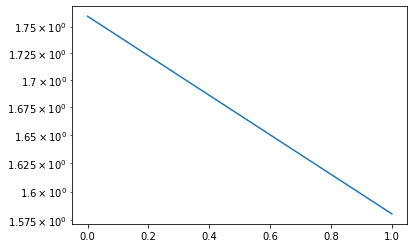

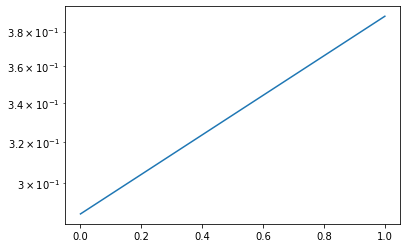

In [56]:
plt.semilogy(training_history.history['loss'])
plt.show()
plt.semilogy(training_history.history['accuracy'])
plt.show()

In [57]:
# img = cv2.imread('Happy-boy-school-uniform.jpg')
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

In [58]:
# img = cv2.resize(img, (1280, 720))
# face_c = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [59]:
# faces = face_c.detectMultiScale(gray, 1.2, 5)
# for (x, y, w, h) in faces :
#         cv2.rectangle(img, (x, y), (x+w, y+h+10), (255,0, 0), 4)

In [60]:
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

In [61]:
# img_resized = np.expand_dims(np.expand_dims(cv2.resize(gray[y : y+h, x : x+w], (48, 48)), -1), 0)
# predictions = model.predict(img_resized)
# pred = np.argmax(predictions)

In [62]:
# cv2.putText(img, emotions[pred], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

In [63]:
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

In [64]:
model_json = model.to_json()
with open('model.json', 'w') as json_file :
    json_file.write(model_json)

In [1]:
Capture = cv2.VideoCapture("The Pursuit Of Happyness- Job interview.mp4") # load the video we want to detect emotions from

NameError: name 'cv2' is not defined

In [ ]:
while True : 
    r, img = Capture.read() # read the video we want to predict emotions faces from or the image we want to predict
    img = cv2.resize(img, (1280, 720)) # resize captures to the shape of the input of model
    if not r :
        break
    face_cascad = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") # cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # detect faces
    faces = face_cascad.detectMultiScale(gray, 1.3, 5) # scalerFace = 1.3 , minNeighbors = 5 # We use v2.CascadeClassifier.detectMultiScale() to find faces
    # drow a rectangle around faces and predict emotions
    for (x, y, w, h) in faces :
        cv2.rectangle(img, (x, y), (x+w, y+h+10), (0,0, 255), 4) # (x, y) is Vertex of the rectangle. and (x+w, y+h+10) is Vertex of the rectangle opposite to pt1
        cut_img = np.expand_dims(np.expand_dims(cv2.resize(gray[y : y+h, x : x+w], (48, 48)), -1), 0) # resize captures to shape (48, 48)
        # detection the emotion
        prediction = model.predict(cut_img)
        emotion = np.argmax(prediction)
        cv2.putText(img, emotions[emotion], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    
    cv2.imshow('emotion : ', img)
    if cv2.waitKey(0) & 0xFF == ord('q'):
        break

Capture.release()
cv2.destroyAllWindows()    

KeyboardInterrupt: 